# PROYECTO 2. RKG (RESTART KERNEL GIRLS)
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys

sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

pd.options.display.max_columns = None

## TRATAMIENTO Y LIMPIEZA DE LOS DATOS A ESTUDIAR

## 1. Unión de las preguntas separadas en varias columnas (q10, q39)

In [2]:
# abrimos el .csv con los datos de Data Analyst para las preguntas relevantes seleccionadas
df = pd.read_csv('../resultados/df_da_relevante.csv', index_col = 0)
df = df.reset_index()
df.sample(2)

,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
707,8056,22-24,Man,China,Master’s degree,< 1 years,"Python, SQL",Python,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Online Service/Internet-based Services,0-49 employees,3-4,Analyze and understand data to influence produ...,Tableau,NaN,NaN,NaN,NaN,NaN,Personal blog,NaN,NaN,NaN,NaN,NaN,"Business intelligence software (Salesforce, Ta..."
1424,15770,30-34,Man,Russia,Master’s degree,3-5 years,"Python, SQL, Other",SQL,"Notepad++,Jupyter Notebook",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Retail/Sales,250-999 employees,5-9,Analyze and understand data to influence produ...,"Microsoft Power BI, Tableau, SAP Analytics Cl...",Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,"Business intelligence software (Salesforce, Ta..."


In [3]:
# sacamos los nulos para monitorearlos a lo largo del proceso
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
index,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
0,0,0,0,0,0,0,143,154,146,1508,1639,2191,2287,2124,2286,2204,2250,2267,2132,2114,2231,2281,2280,2276,2301,2206,193,114,130,150,227,1069,1858,2266,2252,2278,1739,2208,1863,2104,2251,1884,2253,533


In [4]:
# creamos una lista con las respuestas de la q10 unificadas
lista_futura_q10 = []

for indice, row in df.iterrows():
    #print(indice, row.index)
    valor = ""
    for i in row.index:
        if "q10" in i:
            if type(row[i]) != float:
                row[i] = row[i].strip()
                valor += row[i] + ","
                if valor == ",":
                    valor = ''
    if valor == '':
        valor = np.nan
    try:
        lista_futura_q10.append(valor.strip(','))
    except:
        lista_futura_q10.append(valor)
lista_futura_q10[:5]

['Kaggle Notebooks,Colab Notebooks,Databricks Collaborative Notebooks',
 'Google Cloud Datalab',
 'Kaggle Notebooks,Colab Notebooks',
 'Kaggle Notebooks,Azure Notebooks',
 'IBM Watson Studio']

In [5]:
# creamos una lista con las respuestas de la q39 unificadas
lista_futura_q39 = []

for indice, row in df.iterrows():
    #print(indice, row.index)
    valor = ""
    for i in row.index:
        if "q39" in i:
            if type(row[i]) != float:
                row[i] = row[i].strip()
                valor += row[i] + ","
                if valor == ",":
                    valor = ''
    if valor == '':
        valor = np.nan
    try:
        lista_futura_q39.append(valor.strip(','))
    except:
        lista_futura_q39.append(valor)
lista_futura_q39[:5]

[nan,
 nan,
 'I do not share my work publicly',
 nan,
 'I do not share my work publicly']

In [6]:
# creamos las columnas unificadas en el dataframe y borramos las sobrantes
df['q10'] = lista_futura_q10
df['q39'] = lista_futura_q39
df.head(3)

,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41,q10,q39
0,16,50-54,Man,Belgium,Bachelor’s degree,20+ years,"Python, SQL",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Energy/Mining,"1000-9,999 employees",5-9,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...","Kaggle Notebooks,Colab Notebooks,Databricks Co...",NaN
1,32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,< 1 years,R,R,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN,NaN,Ggplot / ggplot2,Manufacturing/Fabrication,250-999 employees,3-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN
2,33,30-34,Woman,Egypt,Bachelor’s degree,3-5 years,Python,R,"Notepad++,Jupyter Notebook",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Non-profit/Service,0-49 employees,0,Analyze and understand data to influence produ...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,"Basic statistical software (Microsoft Excel, G...","Kaggle Notebooks,Colab Notebooks",I do not share my work publicly


In [7]:
df.drop(columns=spv.columnas_sobrantes, inplace=True)
df.sample()

,index,age,gender,q3,q4,q6,q7,q8,q9,q14,q20,q21,q22,q24,q34,q35,q41,q10,q39
791,9066,30-34,Man,Brazil,Bachelor’s degree,< 1 years,"Python, R, SQL, Java",Python,"PyCharm , Spyder,Jupyter Notebook",Other,Online Business/Internet-based Sales,"1000-9,999 employees",1-2,Other,"Microsoft Power BI, Tableau, Qlik",Microsoft Power BI,NaN,Other,Other


In [8]:
# reordenamos las columnas
df = df.reindex(columns = ['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9', 'q10', 'q14', 'q20', 'q21', 'q22', 'q24', 'q34', 'q35', 'q39', 'q41'])

In [9]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
0,0,0,0,0,0,143,154,146,809,193,114,130,150,227,1069,1858,1099,533


In [10]:
df.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
1792,30-34,Man,Portugal,Master’s degree,1-3 years,"Python, SQL",Python,"Spyder,Jupyter Notebook",NaN,"Matplotlib ,Seaborn",Manufacturing/Fabrication,250-999 employees,0,Analyze and understand data to influence produ...,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
298,30-34,Woman,Germany,Master’s degree,10-20 years,"R, SQL",R,RStudio,NaN,"Ggplot / ggplot2 ,Shiny",Government/Public Service,50-249 employees,1-2,Analyze and understand data to influence produ...,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
709,30-34,Man,Nigeria,Master’s degree,I have never written code,NaN,NaN,NaN,NaN,NaN,Accounting/Finance,0-49 employees,0,None of these activities are an important par...,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."


In [11]:
# def limpiar_columna(row):
#     if 'Jupyter (JupyterLab, Jupyter Notebooks, etc) ' in row:
#         r = row.replace(r'Jupyter \(JupyterLab, Jupyter Notebooks, etc\) ', 'Jupyter-JupyterLab-JupyterNotebooks', regex = True)
#         return r
#     else:
#         return row

In [12]:
def limpiar_q9(row):
    try:
        if 'Jupyter (JupyterLab, Jupyter Notebooks, etc)' in row:
            r = row.replace("Jupyter (JupyterLab, Jupyter Notebooks, etc)", 'Jupyter-JupyterLab-JupyterNotebooks')
            return r
        else:
            return row
    except:
        return row

In [13]:
df['q9'] = df['q9'].apply(limpiar_q9)

In [14]:
df['q9'].reset_index().sample(10)

,index,q9
981,981,"Jupyter-JupyterLab-JupyterNotebooks ,PyCharm ,..."
2193,2193,"RStudio , Notepad++"
1479,1479,"RStudio ,Visual Studio"
407,407,"Visual Studio , Notepad++, Sublime Text,Jupyte..."
1824,1824,"PyCharm , Sublime Text,Jupyter Notebook"
306,306,"RStudio ,PyCharm ,Jupyter Notebook"
534,534,"Sublime Text, Vim / Emacs,Jupyter Notebook"
1700,1700,"Jupyter-JupyterLab-JupyterNotebooks ,RStudio ,..."
1594,1594,"RStudio ,Visual Studio Code (VSCode) ,PyCharm ..."
1324,1324,"Sublime Text,Jupyter Notebook"


In [15]:
def limpiar_q24(row):
    try:
        if 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data' in row:
            r = row.replace('Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 'Build and/or run the data infrastructure that my business uses for storing analyzing and operationalizing data')
            return r
        else:
            return row
    except:
        return row

In [16]:
df['q24'] = df['q24'].apply(limpiar_q24)
df['q24'].reset_index().sample(10)

,index,q24
2273,2273,Analyze and understand data to influence produ...
1811,1811,NaN
113,113,Analyze and understand data to influence produ...
60,60,Analyze and understand data to influence produ...
2171,2171,Build and/or run the data infrastructure that...
154,154,Analyze and understand data to influence produ...
401,401,Analyze and understand data to influence produ...
579,579,Analyze and understand data to influence produ...
755,755,None of these activities are an important par...
1407,1407,Analyze and understand data to influence produ...


In [17]:
# def limpiar_q41(row):
#     try:
#         if "Basic statistical software (Microsoft Excel', ' Google Sheets', ' etc.)" in row:
#             r = row.replace("Jupyter (JupyterLab, Jupyter Notebooks, etc)", "Basic statistical software (Microsoft Excel-Google Sheets-etc.)")
#             return r
#         elif "Local development environments (RStudio', ' JupyterLab', ' etc.)" in row:
#             r = row.replace("Local development environments (RStudio', ' JupyterLab', ' etc.)", "Local development environments (RStudio-JupyterLab-etc)")
#             return r
#         elif "Business intelligence software (Salesforce',' Tableau',' Spotfire',' etc.)" in row:
#             r = row.replace("Business intelligence software (Salesforce',' Tableau',' Spotfire',' etc.)", "Business intelligence software (Salesforce-Tableau-Spotfire.etc.)")
#             return r
#         elif "Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)" in row:
#             r = row.replace("Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)", "Cloud-based data software & APIs (AWS-GCP-Azure-etc.)")
#             return r
#             return r
#         elif "Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)" in row:
#             r = row.replace("Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)", "Cloud-based data software & APIs (AWS-GCP-Azure-etc.)")
#             return r
#         else:
#             return row
#     except:
#         return row

In [55]:
for i in range(100):  
    print(df['q41'][i])

['Local development environments (RStudio-JupyterLab)']
nan
['Basic statistical software (Microsoft Excel-Google Sheets)']
['Basic statistical software (Microsoft Excel-Google Sheets)']
['Local development environments (RStudio-JupyterLab)']
['Basic statistical software (Microsoft Excel-Google Sheets)']
['Basic statistical software (Microsoft Excel-Google Sheets)']
nan
['Business intelligence software (Salesforce-Tableau-Spotfire)']
['Local development environments (RStudio-JupyterLab)']
['Basic statistical software (Microsoft Excel-Google Sheets)']
['Local development environments (RStudio-JupyterLab)']
['Cloud-based data software & APIs (AWS-GCP-Azure)']
['Basic statistical software (Microsoft Excel-Google Sheets)']
['Advanced statistical software (SPSS-SAS)']
nan
['Basic statistical software (Microsoft Excel-Google Sheets)']
nan
nan
['Basic statistical software (Microsoft Excel-Google Sheets)']
['Basic statistical software (Microsoft Excel-Google Sheets)']
nan
['Local development en

In [19]:
def limpiar_q41a(row):
    try:
        if "Basic statistical software (Microsoft Excel, Google Sheets, etc.)" in row:
            r = row.replace("Basic statistical software (Microsoft Excel, Google Sheets, etc.)", "Basic statistical software (Microsoft Excel-Google Sheets)")
            return r
        else:
            return row
    except:
        return row

In [20]:
df['q41'] = df['q41'].apply(limpiar_q41a)

In [21]:
def limpiar_q41b(row):
    try:
        if "Local development environments (RStudio, JupyterLab, etc.)" in row:
            r = row.replace("Local development environments (RStudio, JupyterLab, etc.)", "Local development environments (RStudio-JupyterLab)")
            return r
        else:
            return row
    except:
        return row

In [22]:
df['q41'] = df['q41'].apply(limpiar_q41b)

In [23]:
def limpiar_q41c(row):
    try:
        if "Business intelligence software (Salesforce, Tableau, Spotfire, etc.)" in row:
            r = row.replace("Business intelligence software (Salesforce, Tableau, Spotfire, etc.)", "Business intelligence software (Salesforce-Tableau-Spotfire)")
            return r
        else:
            return row
    except:
        return row

In [24]:
df['q41'] = df['q41'].apply(limpiar_q41c)

In [25]:
def limpiar_q41d(row):
    try:
        if "Advanced statistical software (SPSS, SAS, etc.)" in row:
            r = row.replace("Advanced statistical software (SPSS, SAS, etc.)", "Advanced statistical software (SPSS-SAS)")
            return r
        else:
            return row
    except:
        return row

In [26]:
df['q41'] = df['q41'].apply(limpiar_q41d)

In [27]:
def limpiar_q41e(row):
    try:
        if "Cloud-based data software & APIs (AWS, GCP, Azure, etc.)" in row:
            r = row.replace("Cloud-based data software & APIs (AWS, GCP, Azure, etc.)", "Cloud-based data software & APIs (AWS-GCP-Azure)")
            return r
        else:
            return row
    except:
        return row

In [28]:
df['q41'] = df['q41'].apply(limpiar_q41e)

In [29]:
# "Basic statistical software (Microsoft Excel', ' Google Sheets', ' etc.)" : 'Basic statistical software (Microsoft Excel-Google Sheets-etc.)',
# "Local development environments (RStudio', ' JupyterLab', ' etc.)" : 'Local development environments (RStudio-JupyterLab-etc)',
# "Business intelligence software (Salesforce',' Tableau',' Spotfire',' etc.)" : 'Business intelligence software (Salesforce-Tableau-Spotfire.etc.)',
# "Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)" : 'Cloud-based data software & APIs (AWS-GCP-Azure-etc.)',
# "Advanced statistical software (SPSS', ' SAS', ' etc.)" : 'Advanced statistical software (SPSS-SAS-etc.)'

In [30]:
# df['q9_'] = df['q9'].str.replace(r'Jupyter \(JupyterLab, Jupyter Notebooks, etc\) ', 'Jupyter (JupyterLab-Jupyter Notebooks-etc),Jupyter Notebook', regex=True)

In [31]:
df.columns

Index(['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9', 'q10', 'q14',
       'q20', 'q21', 'q22', 'q24', 'q34', 'q35', 'q39', 'q41'],
      dtype='object')

In [32]:
# for col in df.columns:
#     df[col] = df[col].replace(spv.dict_changes, regex=True)

In [33]:
df.sample(5)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
398,35-39,Man,United States of America,Bachelor’s degree,5-10 years,"Python, SQL, Javascript, Bash",Python,"Visual Studio ,Visual Studio Code (VSCode) , N...",Colab Notebooks,"Matplotlib ,Seaborn",Manufacturing/Fabrication,250-999 employees,3-4,Analyze and understand data to influence produ...,Microsoft Power BI,NaN,I do not share my work publicly,Local development environments (RStudio-Jupyte...
1392,25-29,Man,United Arab Emirates,Bachelor’s degree,1-3 years,Python,Python,Jupyter Notebook,NaN,"Matplotlib ,Seaborn",Government/Public Service,"10,000 or more employees",0,Analyze and understand data to influence produ...,"Microsoft Power BI, Tableau",Tableau,Kaggle,Basic statistical software (Microsoft Excel-Go...
2294,35-39,Man,Pakistan,Master’s degree,< 1 years,"Python, SQL",Python,Jupyter Notebook,Other,"Matplotlib ,Seaborn",Accounting/Finance,"10,000 or more employees",20+,Analyze and understand data to influence produ...,"Microsoft Power BI, Tableau",Microsoft Power BI,I do not share my work publicly,Other
1665,30-34,Man,Colombia,Master’s degree,3-5 years,"Python, R, C++",R,"Jupyter-JupyterLab-JupyterNotebooks ,RStudio","Kaggle Notebooks,Colab Notebooks",Shiny,Government/Public Service,250-999 employees,20+,Analyze and understand data to influence produ...,Microsoft Power BI,NaN,"GitHub,Shiny",Local development environments (RStudio-Jupyte...
99,35-39,Woman,Australia,Doctoral degree,3-5 years,"Python, SQL",SQL,"Visual Studio Code (VSCode) ,PyCharm ,Jupyter ...",NaN,"Matplotlib ,Seaborn",Computers/Technology,50-249 employees,3-4,Analyze and understand data to influence produ...,NaN,NaN,NaN,Local development environments (RStudio-Jupyte...


In [34]:
# dict_keys = list(spv.dict_changes.keys())

In [35]:
# def limpiar_columna(row):
#     if row in dict_keys:
#         r = row.replace(spv.dict_changes, regex = True)
#         return r
#     else:
#         return row

In [36]:
# hue_cols = []
# for col in df.columns:
#     if col not in spv.columnas_unidas:
#         hue_cols.append(col)
#     else:
#         pass

In [37]:
# for col in spv.columnas_unidas:
#     df[col] = df[col].apply(limpiar_columna)

In [38]:
df.sample(2)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
792,22-24,Woman,India,Professional doctorate,I have never written code,NaN,NaN,NaN,NaN,NaN,Medical/Pharmaceutical,"1000-9,999 employees",20+,None of these activities are an important par...,NaN,NaN,NaN,Advanced statistical software (SPSS-SAS)
1933,22-24,Man,Bangladesh,Bachelor’s degree,< 1 years,"Python, R",Python,"RStudio ,Jupyter Notebook",Kaggle Notebooks,Matplotlib,Non-profit/Service,0-49 employees,0,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN


In [39]:
for col in spv.columnas_unidas:
    df[col] = df[col].str.split(',')

In [40]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
0,0,0,0,0,0,143,154,146,809,193,114,130,150,227,1069,1858,1099,533


In [41]:
df.to_csv('../resultados/df_da_relevante_limpio.csv')

In [42]:
df.columns

Index(['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9', 'q10', 'q14',
       'q20', 'q21', 'q22', 'q24', 'q34', 'q35', 'q39', 'q41'],
      dtype='object')

In [43]:
spv.columnas_unidas

['q7', 'q9', 'q10', 'q14', 'q20', 'q24', 'q39', 'q41']

In [44]:
df_q7 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q21', 'q22', 'q34', 'q35']]
df_q9 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q9', 'q21', 'q22', 'q34', 'q35']]
df_q10 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q10', 'q21', 'q22', 'q34', 'q35']]
df_q14 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q14', 'q21', 'q22', 'q34', 'q35']]
df_q20 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q20', 'q21', 'q22', 'q34', 'q35']]
df_q24 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q24', 'q34', 'q35']]
df_q39 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q34', 'q35', 'q39']]
df_q41 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q34', 'q35', 'q41']]

In [45]:
df_q7 = df.explode('q7')
df_q9 = df.explode('q9')
df_q10 = df.explode('q10')
df_q14 = df.explode('q14')
df_q20 = df.explode('q20')
df_q24 = df.explode('q24')
df_q39 = df.explode('q39')
df_q41 = df.explode('q41')

In [60]:
df_q7.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
184,40-44,Man,Nigeria,Bachelor’s degree,1-3 years,Python,Python,"[PyCharm , Spyder, Sublime Text, Jupyter Not...",NaN,"[ Matplotlib , Seaborn ]",[Retail/Sales],250-999 employees,1-2,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Business intelligence software (Salesforce-Ta...
1232,18-21,Man,Nigeria,Bachelor’s degree,< 1 years,SQL,Python,[Jupyter Notebook],"[Kaggle Notebooks, Google Cloud Datalab]","[ Matplotlib , Seaborn ]",[Accounting/Finance],0-49 employees,1-2,[Analyze and understand data to influence prod...,NaN,NaN,NaN,NaN
555,25-29,Man,Morocco,Master’s degree,5-10 years,Python,Python,[Visual Studio Code (VSCode) ],[Colab Notebooks],"[ Matplotlib , Seaborn , Plotly / Plotly Expre...",[Energy/Mining],0-49 employees,1-2,[Analyze and understand data to influence prod...,None,NaN,[I do not share my work publicly],[Local development environments (RStudio-Jupyt...


In [56]:
df_q7['q7']

0            Python
0               SQL
1                 R
2            Python
3            Python
           ...     
2299              C
2300         Python
2300            SQL
2300     Javascript
2300           Bash
Name: q7, Length: 5430, dtype: object

In [63]:
mask = df_q7['q3'].isin(spv.lista_europa)
df_europa = df_q7[mask]


<AxesSubplot:xlabel='count', ylabel='q7'>

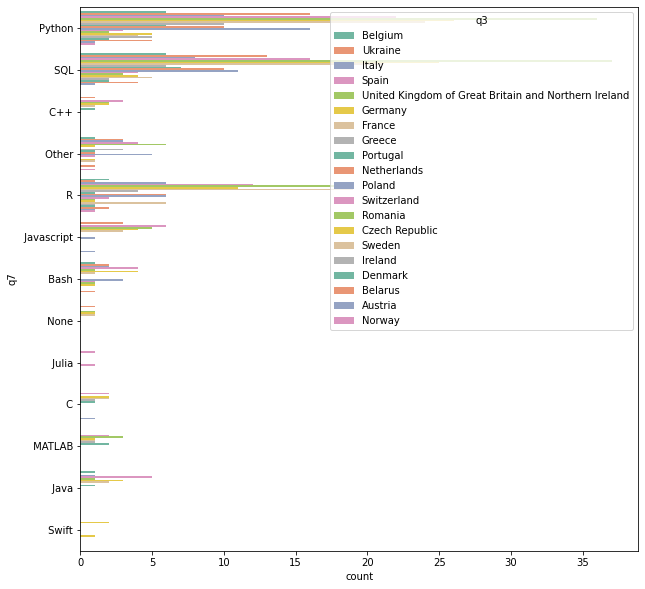

In [66]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q7', hue = 'q3', data = df_europa, palette = 'Set2')

<AxesSubplot:xlabel='count', ylabel='q7'>

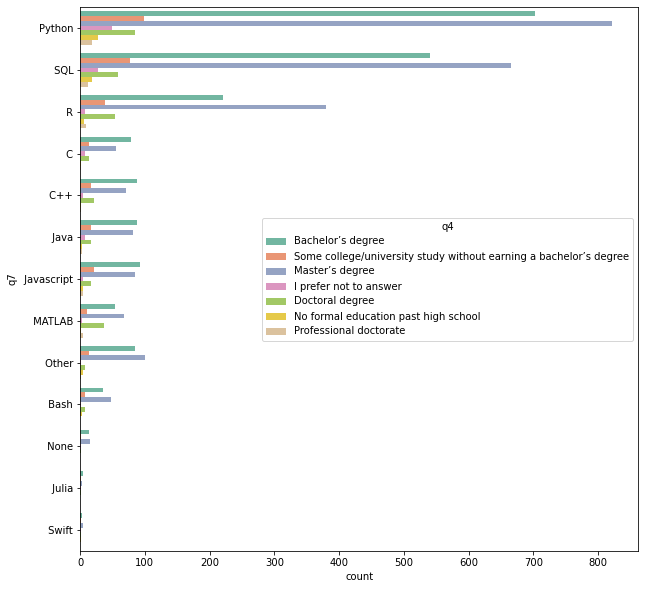

In [61]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q7', data = df_q7,hue = 'q4', palette = 'Set2')

<AxesSubplot:xlabel='count', ylabel='q9'>

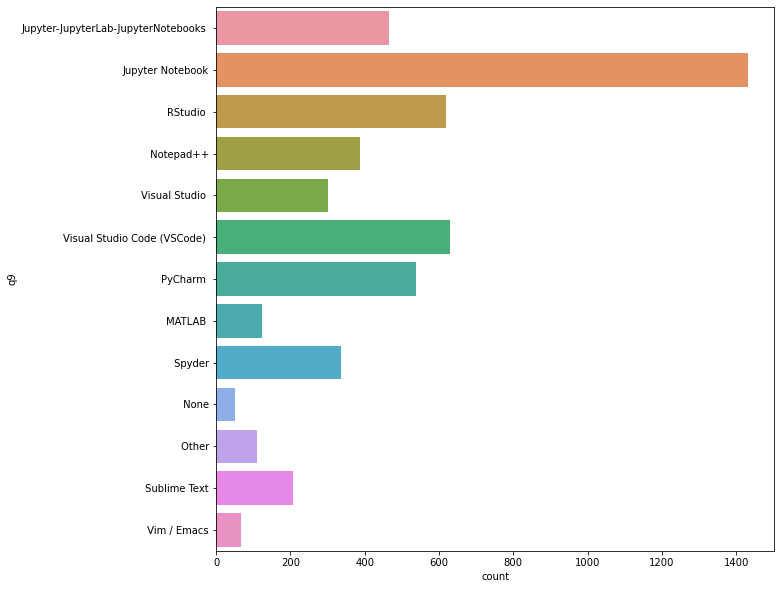

In [48]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q9', data = df_q9)

<AxesSubplot:xlabel='count', ylabel='q24'>

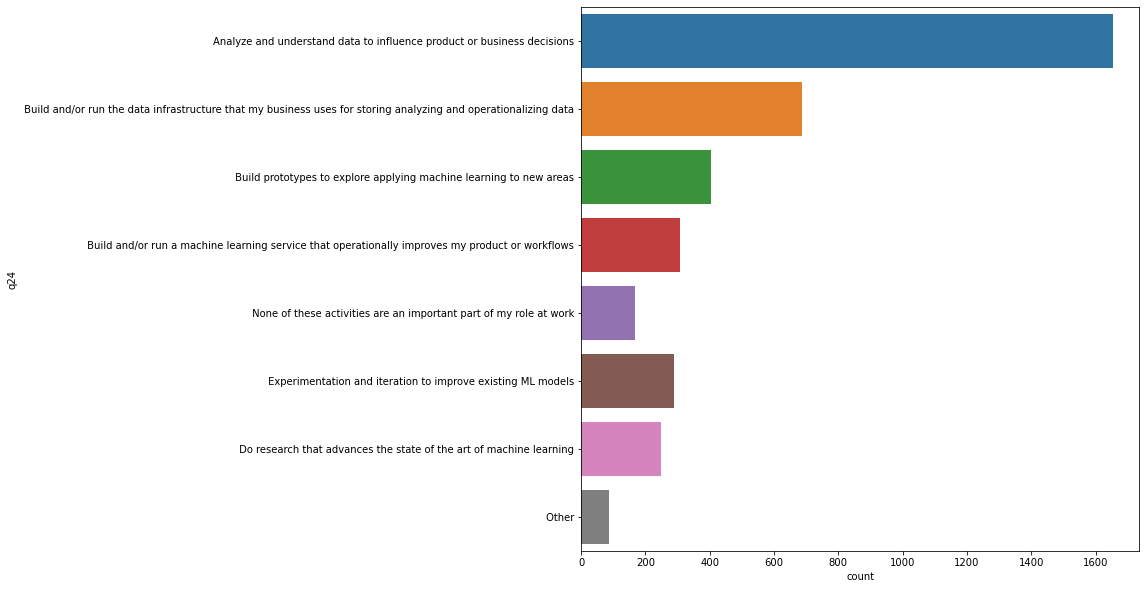

In [49]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q24', data = df_q24)

<AxesSubplot:xlabel='count', ylabel='q39'>

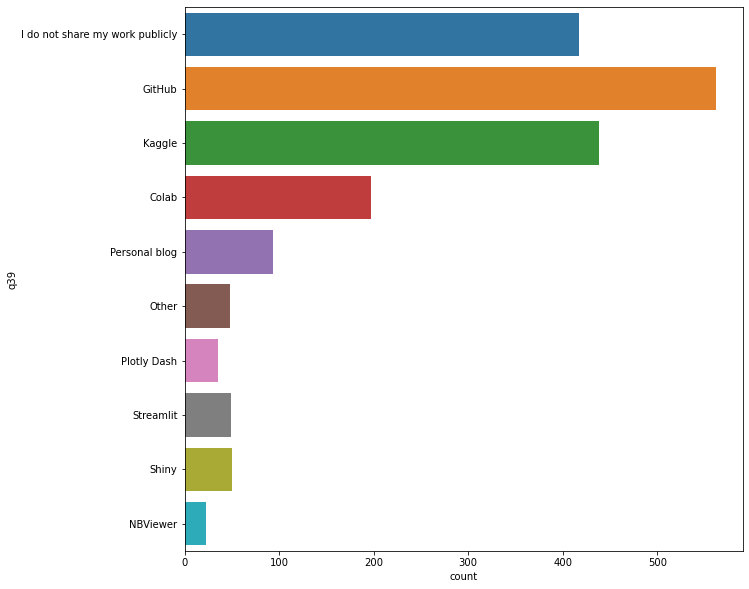

In [50]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q39', data = df_q39)

<AxesSubplot:xlabel='count', ylabel='q41'>

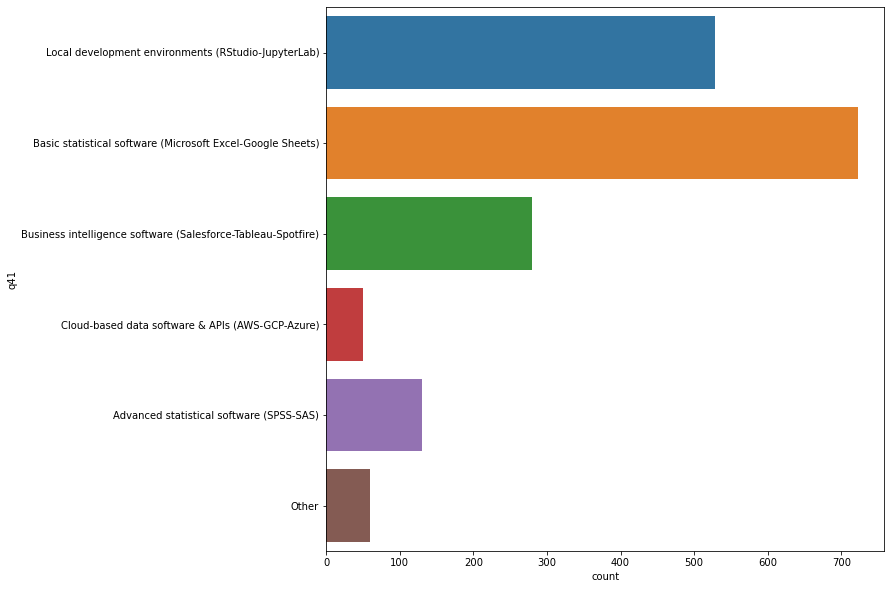

In [51]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q41', data = df_q41)

<AxesSubplot:xlabel='count', ylabel='q9'>

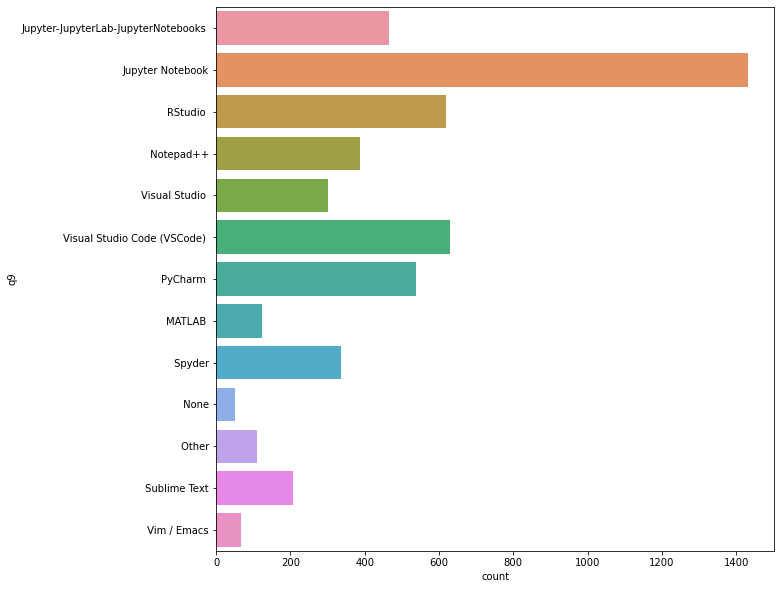

In [52]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q9', data = df_q9)

<AxesSubplot:xlabel='count', ylabel='q14'>

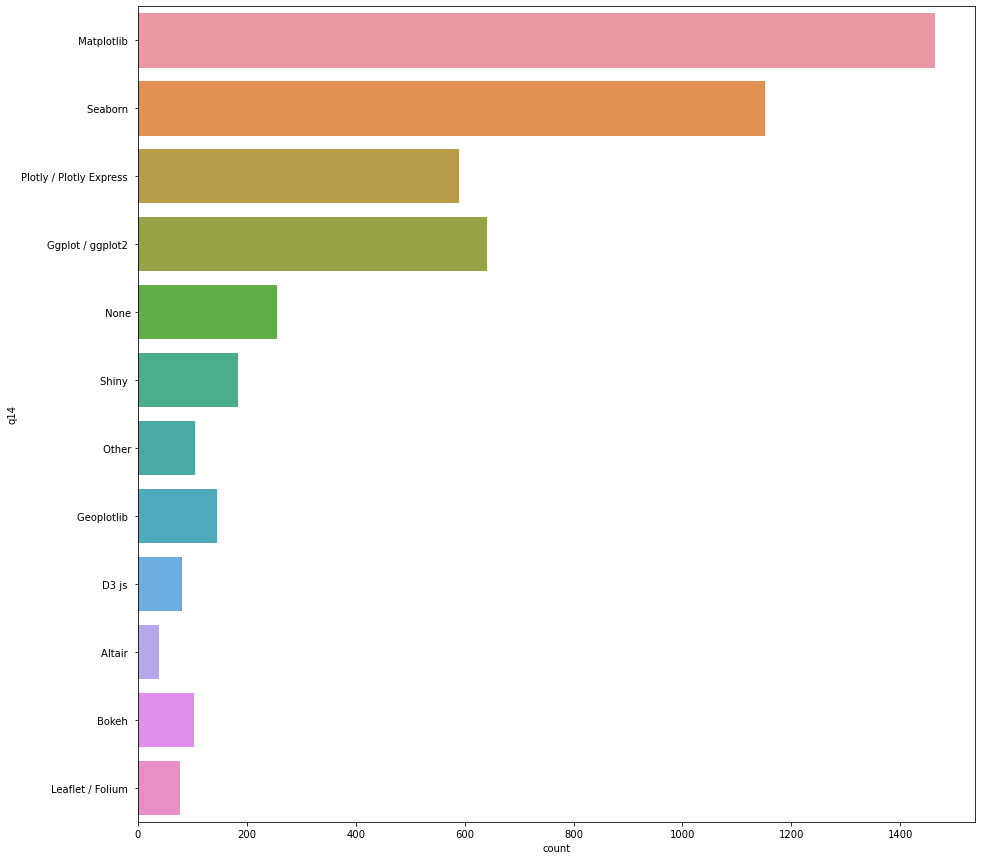

In [53]:
plt.figure(figsize = (15,15))
sns.countplot(y = 'q14', data = df_q14)

In [ ]:
df_explode.head()

In [ ]:
df_explode.sample(5)

In [ ]:
# df["q7"] = df["q7"].str.split(',')

In [ ]:
df.sample(3)

In [ ]:
# df["q7"].drop_duplicates(inplace=True)
# df["q7"] = df["q7"].explode()

In [ ]:
# for q in lista_qs_exp:
#     df[q] = df[q].str.split(',')
#     df[q] = df[q].explode(q)


In [ ]:
# Dividimos las respuestas de la pregunta q7 por la ','
# for con in 
# df["q7"] = df["q7"].str.split(",")
# df_q7 = df_ana2.explode("q7")
# sns.countplot(x = "q7", data = df_q7, hue = "q6")

In [ ]:
df.isnull().sum()/df.shape[0]

In [ ]:
# #probamos rename
# def renombrar_columnas(dataframe,inicio,final,num_q):
#     nom_col = {}
#     for col in dataframe.columns[inicio : final+1]:
#         try: 
#             for i in dataframe[col].unique():
#                 i = str(i) 
#                 if i != 'nan':
#                     i = i.strip().replace(' ', '_')
#                     nom_col[col] = f'q{num_q}_{i}'
#                 else:
#                     pass
#         except:
#             print('estoy en el except con la columna {col} , elemento {i}')
            
#     renombrado = dataframe.rename(columns = nom_col)
    
#     return renombrado

In [ ]:
df = renombrar_columnas(df, 8, 24, 10)


In [ ]:
df.sample(3)

In [ ]:
df = renombrar_columnas(df, 28, 37, 39)

In [ ]:
df.columns

In [ ]:
df_ana = df.copy()
df_ana.head(2)

In [ ]:
df_ana.columns

In [ ]:
df_ana2 = df_ana[['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9']]
df_ana2.head(2)

In [ ]:
df_ana2["q7"] = df_ana2["q7"].str.split(",")

In [ ]:
df_ana2.head(2)

In [ ]:
df_q7 = df_ana2.explode("q7")
df_q7.head()

In [ ]:
sns.countplot(x = "q7", data = df_q7, hue = "q6")

In [ ]:
#funcion para cambiar los nans
def yes_no(dataframe, inicio, final):
    for col in dataframe.columns[inicio:(final+1)]:
        dataframe[col] = dataframe[col].apply(lambda data: np.where(type(data) != float, 'yes', 'no'))
    return dataframe

In [ ]:
df = yes_no(df, 8, 24)

In [ ]:
df = yes_no(df, 28, 37)

In [ ]:
df.sample(3)

In [ ]:
df.isnull().sum().reset_index().T

In [ ]:
q7_responses = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']

In [ ]:
# def sacar_herramienta(col):
    
#     try:
#         if re.findall(patron, col):
#             return 'yes'
#         else:
#             return 'no'
#     except:
#         return 'unknown'


In [ ]:
def sacar_herramienta(col):
    
    try:
        if re.findall(patron, col):
            return 1
        else:
            return 0
    except:
        return np.nan

In [ ]:
for patron in q7_responses:
    df[f'q7_{patron}'] = df['q7'].apply(sacar_herramienta)

df.drop(columns = 'q7', inplace = True)

In [ ]:
df.head(2)

In [ ]:
q9_responses = ['JupyterLab', 'RStudio', 'Visual Studio', 'Visual Studio Code (VSCode)', 'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim, Emacs or similar', 'MATLAB', 'Jupyter Notebook', 'None', 'Other']

In [ ]:
for patron in q9_responses:
    df[f'q9_{patron}'] = df['q9'].apply(sacar_herramienta)
df.drop(columns = 'q9', inplace = True)

In [ ]:
q14_responses = ['Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'None', 'Other']
for patron in q14_responses:
    df[f'q14_{patron}'] = df['q14'].apply(sacar_herramienta)

df.drop(columns = 'q14', inplace = True)

In [ ]:
q41_responses = ['Basic statistical software (Microsoft Excel, Google Sheets, etc.)', 'Advanced statistical software (SPSS, SAS, etc.)', 
                 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)', 'Local development environments (RStudio, JupyterLab, etc.)', 
                 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)', 'Other']
for patron in q14_responses:
    df[f'q41_{patron}'] = df['q41'].apply(sacar_herramienta)

df.drop(columns = 'q41', inplace = True)

In [ ]:
df.sample(3)

In [ ]:
orden = ['age', 'gender', 'q3', 'q4', 'q6', 'q7_Python', 'q7_R', 'q7_SQL', 'q7_C', 'q7_C++', 'q7_Java', 'q7_Javascript', 'q7_Julia','q7_Swift', 'q7_Bash', 'q7_MATLAB', 
         'q7_None', 'q7_Other','q8', 'q9_JupyterLab', 'q9_RStudio', 'q9_Visual Studio','q9_Visual Studio Code (VSCode)', 'q9_PyCharm', 'q9_Spyder','q9_Notepad++', 
         'q9_Sublime Text', 'q9_Vim, Emacs or similar', 'q9_MATLAB', 'q9_Jupyter Notebook', 'q9_None', 'q9_Other','q10_Kaggle_Notebooks','q10_Colab_Notebooks', 'q10_Azure_Notebooks',
         'q10_Paperspace_/_Gradient', 'q10_Binder_/_JupyterHub', 'q10_Code_Ocean', 'q10_IBM_Watson_Studio', 'q10_Amazon_Sagemaker_Studio_Notebooks', 'q10_Amazon_EMR_Notebooks',
         'q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI)', 'q10_Google_Cloud_Datalab', 'q10_Databricks_Collaborative_Notebooks', 'q10_Zeppelin_/_Zepl_Notebooks', 'q10_Deepnote_Notebooks',
         'q10_Observable_Notebooks', 'q10_None', 'q10_Other', 'q14_Seaborn', 'q14_Plotly / Plotly Express', 'q14_Ggplot / ggplot2', 'q14_Shiny', 'q14_D3 js', 'q14_Altair', 'q14_Bokeh', 
         'q14_Geoplotlib','q14_Leaflet / Folium', 'q14_None', 'q14_Other','q34', 'q35', 'q39_Plotly_Dash', 'q39_Streamlit', 'q39_NBViewer', 'q39_GitHub', 'q39_Personal_blog', 'q39_Kaggle', 
         'q39_Colab', 'q39_Shiny', 'q39_I_do_not_share_my_work_publicly', 'q39_Other', 'q41_Seaborn', 'q41_Plotly / Plotly Express', 'q41_Ggplot / ggplot2', 'q41_Shiny', 'q41_D3 js', 
         'q41_Altair', 'q41_Bokeh', 'q41_Geoplotlib', 'q41_Leaflet / Folium', 'q41_None', 'q41_Other']

In [ ]:
df = df.reindex(columns = orden)

In [ ]:
df.sample()

In [ ]:
df_q7 = df[df.columns[5:18]]

In [ ]:
q7_count = df_q7.sum().reset_index()

In [ ]:
q7_count.columns = ['herramienta', 'conteo']

In [ ]:
q7_count

In [ ]:
sns.barplot(y = 'herramienta', x= 'conteo', data = q7_count)

In [ ]:
sns.barplot(y = 'herramienta', x = ,hue = 'gender', data = df)

In [ ]:
for col in df.columns[5:18]:
    print(f'{col}')
    display(df[col].value_counts().reset_index())